# Foundation of Data Science

Thomas Liebig - 2023

Find a copy of this material online at [github](https://github.com/thomasliebig/jupyterlite).

Launch with binder: TODO
Cite as 
```bibtex
@misc{liebig23,
  author        = {Thomas Liebig},
  title         = {Lecture notes Foundation of Data Science},
  month         = {October},
  year          = {2023},
  publisher     = {TU Dortmund}
}
```

prerequisites:
```bash
conda update --all
conda install -c conda-forge rise
conda install -c conda-forge jupyter_contrib_nbextensions
conda install nbconvert
pip install -m notebook==6.1.5
jupyter contrib nbextension install --user
jupyter nbextension enable splitcell/splitcell
jupyter-nbextension enable rise --py --sys-prefix
jupyter-nbextension enable rise --py --user
```


<div class="alert alert-block alert-info">
<b>Tip:</b> These Notes are best read without code blocks. Run next cell and press button, to hide all code cells.
</div>

In [40]:
# hide input cells
# copied from https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer#answer-28073228
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the code cells. (just working in jupyter notebook, not jupyterlab)"></form>''')

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Fundamentals

### Motivation - Data Science

Data Science covers all aspects of 

* recording
* processing
* storage
* transfer
* visualization
* sharing 

of data

application domains
* health data
* mobility data
* indutrial data
* process data
* geographic data
* civil protection
* $\ldots$ many other domains


In this lecture, focus on 
* Methods
* interdisciplinarity
* social skills

* ... and examples

### Objectives

* Introduction to Data Science and Data representation
* understanding of data processing pipelines (e.g. parallel computing, CRISP-DM)
* overview of tools: jupyterlab, python, etc.
* basic analysis techniques:
  * frequent items
  * clustering
  * decision tree
  * support vector machine
  * probabilistic models
  * neuronal networks
* parallel algorithms
* graph algorithms, search

### Course Outline

* Introduction
* Data Science Fundamentals
* Parallel Computing
* Graph Algorithms & Page Rank
* Unsupervised Learning
  * Frequent Sets
  * Clustering
* Efficient Similarity Computation & Search
* Supervised Learning
  * Decision Trees
  * Support Vector Machine
  * Artificial Neuronal Networks
  * Probabilistic Graphical Models

### Literature

<table width="100%" cellspacing="0">
<tbody>
<tr>
<td>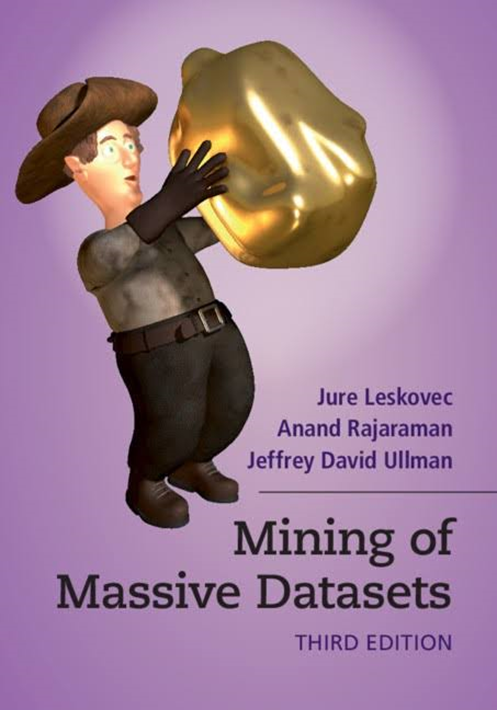</td>
<td>Leskovec, Jure, Anand Rajaraman, and Jeffrey David Ullman. Mining of massive data sets. Cambridge university press, 2020.<br/><a hrfef="http://www.mmds.org/">Online available: http://www.mmds.org/</a>
</td>
</tr>
</tbody>
</table>

<table width="100%" cellspacing="0">
<tbody>
<tr>
<td>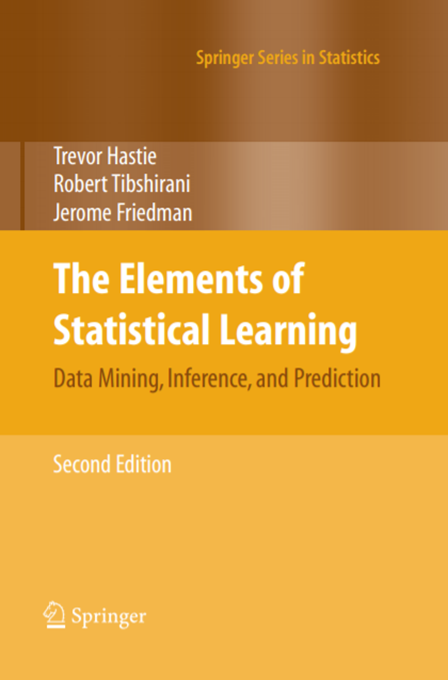</td>
<td>Hastie, Trevor, Robert Tibshirani, and Jerome Friedman. The elements of statistical learning: data mining, inference, and prediction. Springer Science & Business Media, 2009. <br/>
<a href="https://web.stanford.edu/~hastie/Papers/ESLII.pdf">Online available: https://web.stanford.edu/~hastie/Papers/ESLII.pdf</a>
</td>
</tr>
</tbody>
</table>

## Fundamentals Information Systems & Data Analysis

### Origin of Data
* observe physical processes in real world
* By observation, we make measurements, represented in some (mathematical) space ($\mathbb{B}$, $\mathbb{Z}$, $\mathbb{N}$, $\mathbb{Q}$, vectors, graphs, strings, $\ldots$ tuples, compounds, images, sounds, $\ldots$)
* Data is partial representation of a snapshot (only valid for specific space, time)
* Observation, eventually is invasive and changes physical process

### Knowledge Discovery from Data process to Extract Knowledge from Collected Data

<div style="text-align:center;">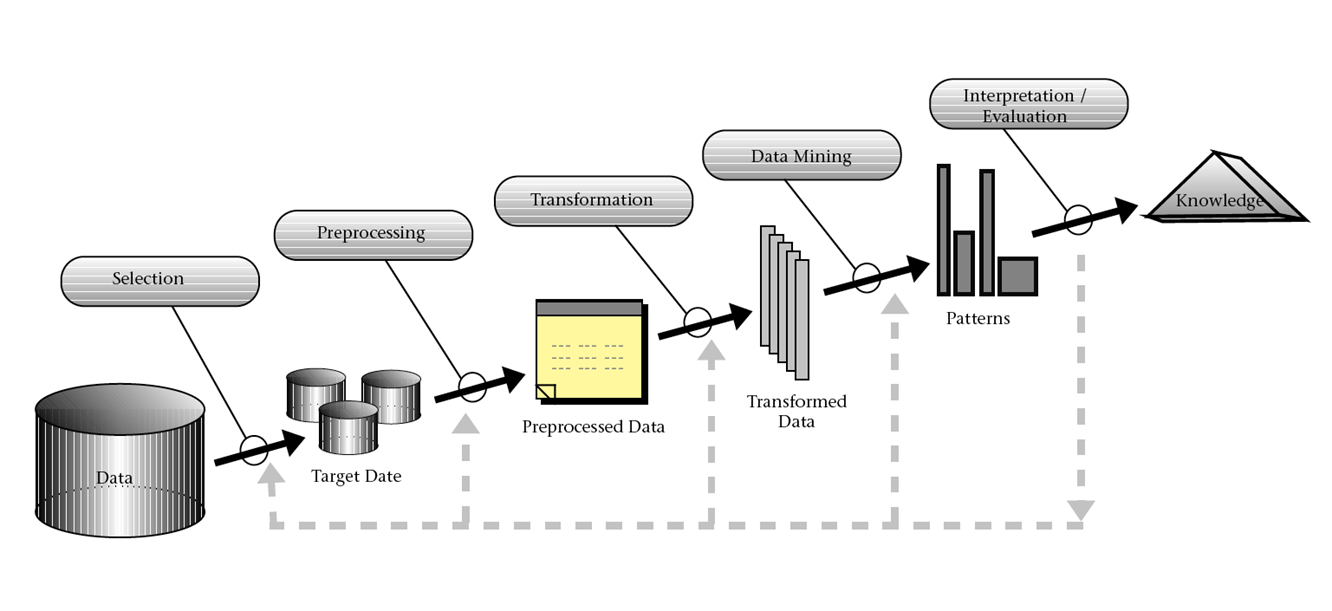</div>

<div class="alert alert-block alert-info">
<b>Further Reading:</b> Fayyad, U., Piatetsky-Shapiro, G., & Smyth, P. (1996). The KDD process for extracting useful knowledge from volumes of data. Communications of the ACM, 39(11), 27-34.
</div>

### Information Systems with Machine Learning

In [5]:
from IPython.display import display, Markdown
display(Markdown('Traditional Software Development'))

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
graph LR;
    developer--> program;
    data--> program;
    program--> result;
""")

Traditional Software Development

In [6]:
from IPython.display import display, Markdown
display(Markdown('*Machine Learning*'))
# If you particularly want to display maths, this is more direct:

# code from https://mermaid.js.org/config/Tutorials.html
# see examples at https://mermaid.js.org/syntax/flowchart.html
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
graph LR;
    developer--> program & learning_program;
    data--> program & learning_program;
    learning_program--> program;
    program--> result;
""")

*Machine Learning*

### Processmodel to Perform Data Mining

* Data Mining is part of the Knowledge Discovery in Databases [KDD process](#Knowledge-Discovery-from-Data-process-to-Extract-Knowledge-from-Collected-Data) 

Cross-industry standard process for data mining (CRISP-DM)



<div style="text-align:center;">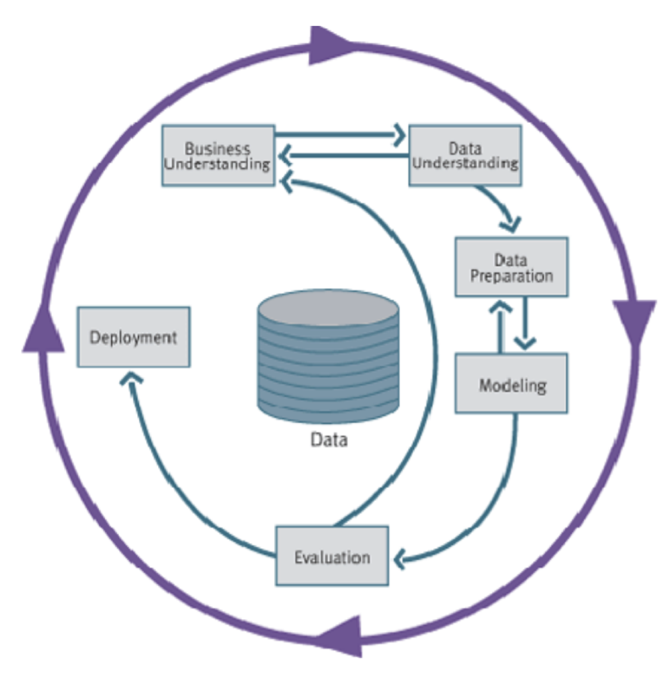</div>

Pete Chapman (1999); The CRISP-DM User Guide

* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation
* Deployment

Observe:
* Sequence is not rigid, iterations required
* Involves several roles!

### Challenges in Data Science

It is not just about applying some statistics/machine learning to a data set.

The entire process is challenging, not just the analysis algorithms:
* Understanding the problem to solve, and its context
* Get the initial data
* Clean and enhance with additional data sources
* Store and manage it
* Correct for bias and outside factors
* Analysis
* Scale to the entire data
* Validation and testing
* Presentation and storytelling
* Automate and deploy


### Unsupervised Learning

* Pattern Search
  - what (co-)occurs often in the data set?
  
* Clustering
  - which data items are similar?

### Supervised Learning

* Task: learn a model $f$ to predict labels $Y$ given features $X$
  - learning searches in a model class $M$ best model $f^{\ast}$ with minimal loss $L$ (e.g., error)
  - $f^{\ast}={\arg\min}_{f \in M} L(Y_{\text{train}},f(X_{\text{train}}))$
* optimization is on labeled training data, where both $X$ and $Y$ are observed, and model performance can be measured $\rightarrow$ *supervised learning* 
* distinguish Regression and Classification based on label range

### Basic Operations in Data Analysis

* Sampling
  - Selection of subsets
* Distances
  - Comparison of data points, data sets, distributions
  - Evaluation of models
* Counting
  - Kolmogorov probabilities
  - Comparing thresholds
  - Estimating Entropy of data sets
* Optimization
  - Model training
  - Model selection

## Scaling Computations

### Hardware Limitations

In [6]:
from IPython.display import display, Markdown
display(Markdown('simplified desktop server system'))

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
graph TB;
    CPU--> Memory;
    Memory--> id[(Harddisk)];
""")

simplified desktop server system

* up to 4 GHz CPUs – does not go any further anymore
* typically 4-8 cores, servers up to 128 cores
* GPU: 1-1.5 GHz, 1000-5000 cores
* RAM: 32-1024 GB, 15-35 GB/s
* GPU RAM: claimed up to 600 GB/s
* PCIe bus: 32 GB/s
* SSD: 1-4 TB, 500 MB/s
* HDD: 4-16 TB, 150 MB/s seq, 3 MB/s random
* Ethernet: 10 Gbit/s  1 GB/s max



### Loading Data is expensive

* GPUs shine if we have highly parallel tasks (e.g., repeated convolutions on an image).
* But not all problems are of this kind, and just loading the data is a bottleneck itself.
  - E.g., Wikidata is about 750 GB now. Loading from SSD: > 25 minutes.
  - Parsing the JSON? At 100 MB/s { > 2 hours (very optimistic).
  - Loading it into a database?
  - Reality: Wikidata takes about 5 days to dump its Wiki, enwiki 3 days.


### Commodity Clusters

In [32]:
from IPython.display import display, Markdown
#display(Markdown('simplified desktop server system'))

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
flowchart TB
    id10[Switch]-->id4[Switch]
    id10[Switch]-->id14[Switch]
    subgraph .
    id4[Switch]-->id5
    id4[Switch]-->id6
    subgraph id5[Computer 1]
    direction TB
    id1[CPU]-->id2[Memory]
    id2[Memory]-->id3[(Harddisk)]
    end
    subgraph id6[Computer 2]
    direction TB
    id7[CPU]-->id8[Memory]
    id8[Memory]-->id9[(Harddisk)]
    end
    end
    subgraph ..
    id14[Switch]-->id15
    id14[Switch]-->id16
    subgraph id15[Computer 1]
    direction TB
    id11[CPU]-->id12[Memory]
    id12[Memory]-->id13[(Harddisk)]
    end
    subgraph id16[Computer 2]
    direction TB
    id17[CPU]-->id18[Memory]
    id18[Memory]-->id19[(Harddisk)]
    end
    end    
""")

Example: Lido3, TU Dortmund

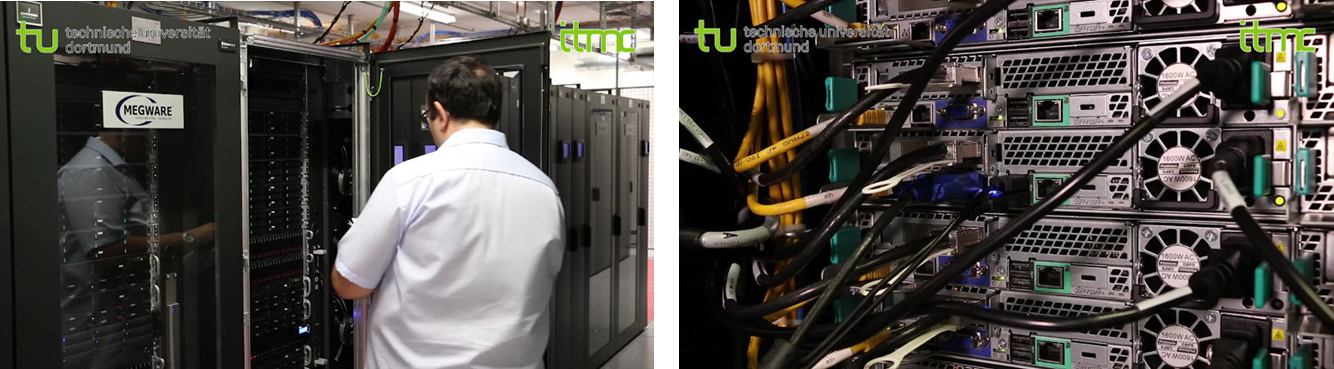

Image credit: https://www.itmc.tu-dortmund.de/cms/de/dienste/hochleistungsrechnen/lido3/index.html 

### Parallel Processing

We cannot jut run a program on a cluster
* no shared RAM in commodity clusters
* individual systems are small (cannot handle all data at once=
* synchronization & locking is slow
* partitioning
* machine failures
* software failures

### Traditional Parallelization Frameworks

* PVM - Parallel Virtual Machine
  - Combine a collection of heterogeneous computers
  - Broadcasting and multicasting messages
* MPI - Message Passing Interface
  - Handles Inter-Process Communication (point to point, broadcast, gather, scatter, accumulate)
  - Could define synchronization points between multiple processes (blocking communication) 
  - Best with homogeneous architecture
  - Widely installed on clusters  

### Distributed File Systems

Over time, dozens of distributed file systems have been proposed:
* AndrewFS [How88], Coda [Sat+90], InterMezzo [BCS99] at Carnegie Mellon University
* Lustre (successor of InterMezzo, used at the Lawrence labs super computer 2003)
* GoogleFS [GGL03], later replaced by the more table/database oriented Colossus [Fik10]
* Hadoop Distributed File System (HDFS), open-source clone of GoogleFS
* Ceph [Wei+06]
* GlusterFS (since 2005/06, bought by Red Hat Linux)
* BeeGFS (Fraunhofer, since 2006/07 used at LiDO3)
* $\ldots$


Cluster File System Architecture

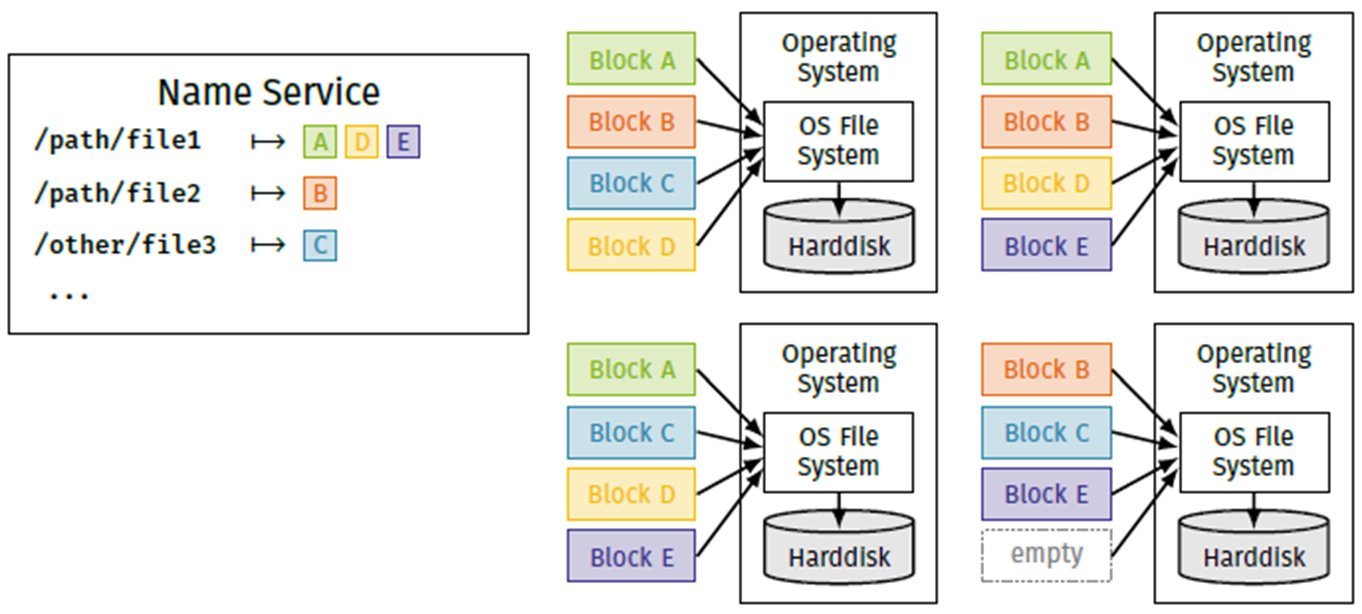

### Taking the Algorithms to the Data

Data storage nodes can serve as computation nodes

Transfer algorithms to the data, not the data to the algorithms

Master node
* Knows where the data resides
* Monitors which nodes are busy, idle or dead
* Which tasks are pending, in-progress, completed, failed, slow

Problems to handle
* Disk failure
* Software failure
* Hardware crash
* Power supply failure
* Loss of communication

### MapReduce programming paradigm

* The input data is stored in key value pairs $(Key_1,value_1)$ and partitioned into blocks of 16-64MB
* The MapReduce programming model requires the developer to write two functions:
  $$map(key_1,value_1) \rightarrow list(key_2,value_2)$$ 
  $$reduce(key_2,list(value_2)) \rightarrow list(value_2)$$
* *Map*: Each block is mapped by a worker with the map function, and split by $key_2$
* *Shuffle*: For each $key_2$, a worker collects the resulting $(key_2,value_2)$ pairs of all mappers
* *Reduce*: All $value_2$ for th same $key_2$ are collected to a list, and passed to the reduce function

The MapReduce system takes care of the shuffle step, load distribution, and failure recovery


MapReduce framework, e.g. hadoop, takes care of all the parallelization details
* data partitioning
* data (re-)distribution and transfer
* shuffle step by using remote reads:Map output is stored on local disks, and read over the network by the Reducer without storing the intermediate data in the regular network filesystem
* exploiting data locality to reduce transfer
* scheduling and orchestration of workers
* failure recovery


#### MapReduce: Logical Data Flow

In [73]:
from IPython.display import display, Markdown
# TODO: draw shuffle step on top

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/svg/" + base64_string))

mm("""
flowchart TB
   id1[Input 0] --> id6[Map 0]:::mapclass
   id2[Input 1] --> id7[Map 1]:::mapclass
   id3[Input 2] --> id8[Map 2]:::mapclass
   id4[Input 3] --> id9[Map 3]:::mapclass
   id5[Input 4] --> id10[Map 4]:::mapclass
   id6[Map 0] --> id11[Reduce 0]:::reduceclass  
   id6[Map 0] --> id12[Reduce 1]:::reduceclass  
   id6[Map 0] --> id13[Reduce 2]:::reduceclass  
   id6[Map 0] --> id14[Reduce 3]:::reduceclass  
   id7[Map 1] --> id11[Reduce 0]:::reduceclass  
   id7[Map 1] --> id12[Reduce 1]:::reduceclass  
   id7[Map 1] --> id13[Reduce 2]:::reduceclass  
   id7[Map 1] --> id14[Reduce 3]:::reduceclass  
   id8[Map 2] --> id11[Reduce 0]:::reduceclass  
   id8[Map 2] --> id12[Reduce 1]:::reduceclass  
   id8[Map 2] --> id13[Reduce 2]:::reduceclass  
   id8[Map 2] --> id14[Reduce 3]:::reduceclass  
   id9[Map 3] --> id11[Reduce 0]:::reduceclass  
   id9[Map 3] --> id12[Reduce 1]:::reduceclass  
   id9[Map 3] --> id13[Reduce 2]:::reduceclass  
   id9[Map 3] --> id14[Reduce 3]:::reduceclass  
   id10[Map 4] --> id11[Reduce 0]:::reduceclass  
   id10[Map 4] --> id12[Reduce 1]:::reduceclass  
   id10[Map 4] --> id13[Reduce 2]:::reduceclass  
   id10[Map 4] --> id14[Reduce 3]:::reduceclass     
   id11[Reduce 0] --> id15[Output 0]
   id12[Reduce 1] --> id16[Output 1]
   id13[Reduce 2] --> id17[Output 2]
   id14[Reduce 3] --> id18[Output 3]
   classDef mapclass fill:#0f0
   classDef reduceclass fill:#aaf
""")

#### Word Count Example

Task: Count the frequency of all words in a document

Map function

```python
def wc_map(k,v):
    for w in v.split(" "):
        yield (w,1)
```

first  sentence $\mapsto$ (first,1),(sentence,1)

second sentence $\mapsto$ (second,1),(sentence,1)


Reduce function

```python
def wc_reduce(k,vs):
    s=0
    for v in vs:
        s +=v
    yield (k,s)
```

(first,[1]) $\mapsto$ (first,1)

(second,[1]) $\mapsto$ (second,1)

(sentence,[1,1]) $\mapsto$ (sentence,2)

#### Shuffle Step

The Map and Reduce functions are *easy*. The crucial part of MapReduce is the *shuffle*

Basic approach:
* mapper output is buffered in memory, periodically written to local disk
* keys are partitioned using a hash function into buckets
* one reducer collects all buckets of the same hash value over the network
* then sorts the bucket by key before invoking the reduce functions

In [72]:
from IPython.display import display, Markdown
# TODO: draw shuffle step on top

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/svg/" + base64_string))

mm("""
flowchart TB
   id1[Map 0]:::mapclass --> id4[0]:::shuffleclass
   id1[Map 0]:::mapclass --> id5[1]:::shuffleclass
   id1[Map 0]:::mapclass --> id6[2]:::shuffleclass
   id1[Map 0]:::mapclass --> id7[3]:::shuffleclass
   id2[Map 1]:::mapclass --> id8[0]:::shuffleclass
   id2[Map 1]:::mapclass --> id9[1]:::shuffleclass
   id2[Map 1]:::mapclass --> id10[2]:::shuffleclass
   id2[Map 1]:::mapclass --> id11[3]:::shuffleclass
   id3[Map 2]:::mapclass --> id12[0]:::shuffleclass
   id3[Map 2]:::mapclass --> id13[1]:::shuffleclass
   id3[Map 2]:::mapclass --> id14[2]:::shuffleclass
   id3[Map 2]:::mapclass --> id15[3]:::shuffleclass
   id4 --> id16[Reduce 0]:::reduceclass
   id8 --> id16[Reduce 0]:::reduceclass
   id12 --> id16[Reduce 0]:::reduceclass
   id5 --> id17[Reduce 1]:::reduceclass
   id9 --> id17[Reduce 1]:::reduceclass
   id13 --> id17[Reduce 1]:::reduceclass
   id6 --> id18[Reduce 2]:::reduceclass
   id10 --> id18[Reduce 2]:::reduceclass
   id14 --> id18[Reduce 2]:::reduceclass
   id7 --> id19[Reduce 3]:::reduceclass
   id11 --> id19[Reduce 3]:::reduceclass
   id15 --> id19[Reduce 3]:::reduceclass
   id16 --> k0
   id16 --> k4
   id16 --> k8
   id17 --> k5
   id18 --> k2
   id18 --> k6
   id19 --> k3
   id19 --> k7
   classDef mapclass fill:#0f0
   classDef reduceclass fill:#aaf
   classDef shuffleclass fill:#faa
""")

#### Benefits of MapReduce

Easy to Use Concept:
1. Map: Extract interesting data
2. Shuffle by assigning keys
3. Reduce: Aggregate as desired
4. Repeat with another Map-Reduce if necessary

The difficult parts, in particular data management and the shuffle, are implemented and optimized only once, only Map and Reduce are adapted to each task.


In [93]:
from IPython.display import display, Markdown
# TODO: draw shuffle step on top

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/svg/" + base64_string))

mm("""
gantt
    title Naive Barrier Synchronization
    %% This is a comment
    dateFormat YYYY-MM-DD
    axisFormat .
    
    section Worker 1
        Map 1         : done, a1, 1, 57m
        Read 1.2      : r1, after a4 a1 a2 a3, 10m
        Read 1.3      : r4, after r1, 9m
        Read 1.4      : r5, after r4, 8m
        Reduce 1      : active, red1, after r1 r2 r3 r4 r5 r6 r7 r8, 14m
    section Worker 2
        Map 2         : done, a2, 1, 52m
        Map 4         : done, a4, after a2, 32m
        Read 3.1      : r2, after a1 a2 a3 a4, 12m
        Read 1.2      : r6, after r2, 11m       
        Reduce 2      : active, red2, after r1 r2 r3 r4 r5 r6 r7 r8, 12m        
    section Worker 3
        Map 3         : done, a3, 1, 1h
        Read 2.1      : r3, after a1 a2 a3 a4, 9m
        Read 2.2      : r7, after r3, 11m
        Read 2.3      : r8, after r7, 9m
        Reduce        : active, red3, after r1 r2 r3 r4 r5 r6 r7 r8, 13m
        
        
""")

In [96]:
from IPython.display import display, Markdown
# TODO: draw shuffle step on top

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/svg/" + base64_string))

mm("""
gantt
    title Overlapping Stages
    %% This is a comment
    dateFormat YYYY-MM-DD
    axisFormat .
    
    section Worker 1
        Map 1         : done, a1, 1, 57m
        Read 1.2      : r1, after a1, 10m
        Read 1.3      : r4, after r1, 9m
        Read 1.4      : r5, after r4, 8m
        Reduce 1      : active, red1, after r1 r4 r5 , 14m
    section Worker 2
        Map 2         : done, a2, 1, 52m
        Map 4         : done, a4, after a2, 32m
        Read 3.1      : r2, after a2 a4, 12m
        Read 1.2      : r6, after r2, 11m       
        Reduce 2      : active, red2, after r2 r6, 12m        
    section Worker 3
        Map 3         : done, a3, 1, 1h
        Read 2.1      : r3, after a3, 9m
        Read 2.2      : r7, after r3, 11m
        Read 2.3      : r8, after r7, 9m
        Reduce        : active, red3, after r3 r7 r8, 13m
        
        
""")

#### MapReduce Improvement: Stragglers

Stragglers: 
* 99.9% of tasks run fast, 0.1% are slow for one or another reason (e.g., overheated CPU, low on memory, clogged network, IO overloaded, . . . )
* But we have to wait for 100% to be finished

Solution: 
* when almost finished, run multiple copies until one is complete “first to finish wins”, the others are terminated


#### MapReduce: Task Granularity


How many data partitions, mappers, reducers?

\# Data Partitions
* MapReduce works best if the data is already loaded into the cluster, otherwise loading the data often already is a bottleneck!
* should be small enough (32 MB for large data)
* should be much more than nodes in the cluster for work balancing!

\# Map tasks
* As many as data partitions

\# Reduce Partitions
* Hadoop suggests 0.95-1.75 x the number of nodes


#### MapReduce: Suitable Algorithms

Problems that can easily be divided into components that can be executed concurrently.

* Search,Grep
* Counts, sums, aggregates
* Unique values/duplicates
* Sort
* Building an inverted index
* Database equi-joins
* Matrix multiplication


#### Example: Building Inverted Index

An inverted index is a mapping from content (such as words) to locations,
whereas a forward index translates the primary key to the contents.

Building an inverted index from words to documents in MapReduce is easy:

* Mapper :	 split document into words, emit $(word, docid)$ pairs
* Reducer :	 sort the $docid$ list for each word, to emit a sorted $(word, [docids])$

The result can be used in full text search:
* To query the index for multiple words (e.g., A and B and C), compute the intersection of all the $[docids]$ lists (in linear time, using an intersection-merge operation).
* We can also include location information etc. commonly used in advanced full text search.


#### Example: Equi-Joins

An equi-join is a common database operation:
```sql
SELECT * FROM Students, Exams WHERE Student.MatrikelNr = Exams.MatrikelNr
```

This is simple in MapReduce by mapping to the join key:

* `map(Student)` 	$\rightarrow$ `(Student.MatrikelNr, (“S”, Student.Name))`
* `map(Exam)`	$\rightarrow$ `(Exam.MatrikelNr, (“E”, Exam.Name, Exam.Grade))`

* `reduce(MatrikelNr, [...])`  $\rightarrow$ `(MatrikelNr, Student.Name, Exam.Name, Exam.Grade)`

Note: we use “S” and “E” to identify which relation the value originates from.

In the general case, each key could receive multiple records of both types (all with the join key).


#### Example: Matrix Multiplication

* product $C=AB \,\text{ with } A\in\mathbb{R}^{n\times m}, B \in\mathbb{R}^{m\times p}$

* element-wise computation of $C$
$$c_{ij}=\sum_{k=1}^m a_{ik}b_{kj}$$

Naive MapReduce implementation of matrix multiplication
* map($A$): $a_{ik}\mapsto (i1,(k,a_{ik})),\ldots,(im,(k,a_{ik}))$
* map($B$): $a_{kj}\mapsto (1j,(k,b_{kj})),\ldots,(mj,(k,b_{kj}))$
* reduce: $(ij,[(1,a_{i1}),(1,b_{1j}), \ldots, (m,a_{im}),(m,b_{mk})]) \mapsto (ij,\sum_{k=1}^m a_{ik}b_{kj})$

properties
* Would create $m$ copies of the entire matrix
* Use chunking an tiling to reduce duplicates